In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [222]:
logfile = '/home/tony/node-red-logs/logsocket.txt'
eventfile = '/home/tony/node-red-logs/eventsocket.txt'

# Testing out Events

In [223]:
with open(eventfile, 'r') as f:
    raw_events = f.readlines()

In [224]:
raw_events = [json.loads(i.replace('\n', '')) for i in raw_events]

In [225]:
qwer = pd.DataFrame(raw_events)

In [226]:
qwer.head()

,source,name,displayName,value,unit,deviceId,hubId,locationId,installedAppId,descriptionText,timestamp
0,DEVICE,switch,Living room light,on,None,35.0,NaN,NaN,NaN,Living room light was turned on,2020-03-19T22:10:27.440Z
1,DEVICE,switch,Living room light,off,None,35.0,NaN,NaN,NaN,Living room light was turned off,2020-03-19T22:10:29.490Z
2,DEVICE,temperature,Bedroom temperature,69.4,°F,3.0,NaN,NaN,NaN,Temperature is 69.4°F,2020-03-19T22:11:26.622Z
3,DEVICE,humidity,Bedroom temperature,43.4,%,3.0,NaN,NaN,NaN,Humidity is 43.4%,2020-03-19T22:11:26.633Z
4,DEVICE,pressure,Bedroom temperature,966.8,mbar,3.0,NaN,NaN,NaN,Pressure is 966.8 mbar,2020-03-19T22:11:26.658Z


In [227]:
qwer[['displayName', 'deviceId']].drop_duplicates()

,displayName,deviceId
0,Living room light,35.0
2,Bedroom temperature,3.0
5,Home thermostat,1.0
6,Rear sliding door,4.0
9,Living room temperature,2.0
26,Anthony Bedroom Light,37.0
123,sunset,NaN
124,sunset time,NaN
167,None,NaN
329,Generic ZigBee RGBW Light,38.0


In [228]:
qwer.head()
qwer.timestamp = pd.to_datetime(qwer.timestamp)
qwer.index = qwer.timestamp

In [229]:
living_temp_id = 2
bed_temp_id = 3

In [230]:
bed_vals = qwer[qwer.deviceId==bed_temp_id]
living_temp = qwer[qwer.deviceId==living_temp_id]

In [231]:
bed_vals.value = bed_vals.value.astype(float)
living_temp.value = living_temp.value.astype(float)

/home/tony/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


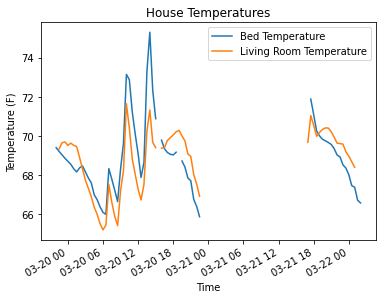

In [232]:
plt.plot(bed_vals[bed_vals.name == 'temperature'].value.resample('30min').mean(), label='Bed Temperature')
plt.plot(living_temp[living_temp.name == 'temperature'].value.resample('30min').mean(), label='Living Room Temperature')
plt.legend()
plt.title("House Temperatures")
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

In [233]:
aa = bed_vals[bed_vals.name == 'temperature'].value.resample('30min').mean()
bb = living_temp[living_temp.name == 'temperature'].value.resample('30min').mean()

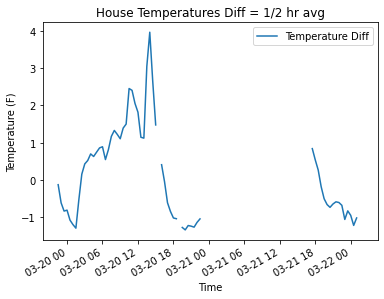

In [234]:
plt.plot(aa-bb, label='Temperature Diff')
plt.legend()
plt.title("House Temperatures Diff = 1/2 hr avg")
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

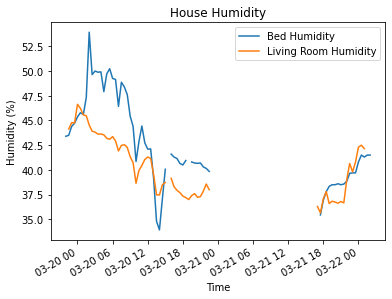

In [235]:
plt.plot(bed_vals[bed_vals.name == 'humidity'].value.resample('30min').mean(), label='Bed Humidity')
plt.plot(living_temp[living_temp.name == 'humidity'].value.resample('30min').mean(), label='Living Room Humidity')
plt.legend()
plt.title("House Humidity")
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

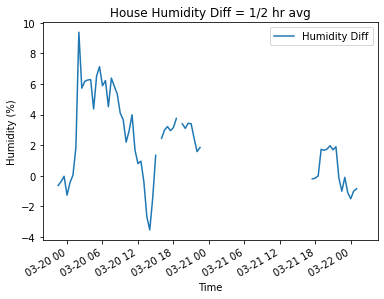

In [236]:
aa = bed_vals[bed_vals.name == 'humidity'].value.resample('30min').mean()
bb = living_temp[living_temp.name == 'humidity'].value.resample('30min').mean()

plt.plot(aa-bb, label='Humidity Diff')
plt.legend()
plt.title("House Humidity Diff = 1/2 hr avg")
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

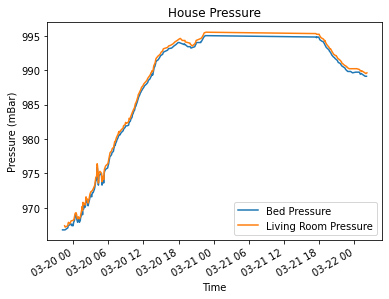

In [237]:
plt.plot(bed_vals[bed_vals.name == 'pressure'].value, label='Bed Pressure')
plt.plot(living_temp[living_temp.name == 'pressure'].value, label='Living Room Pressure')
plt.legend()
plt.title("House Pressure")
plt.xlabel('Time')
plt.ylabel('Pressure (mBar)')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()

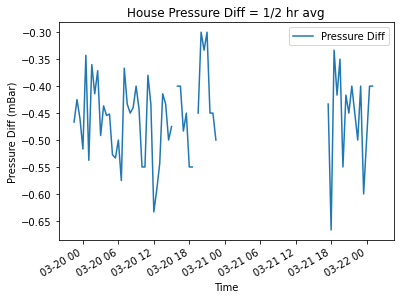

In [238]:
aa = bed_vals[bed_vals.name == 'pressure'].value.resample('30min').mean()
bb = living_temp[living_temp.name == 'pressure'].value.resample('30min').mean()

plt.plot(aa-bb, label='Pressure Diff')
plt.legend()
plt.title("House Pressure Diff = 1/2 hr avg")
plt.xlabel('Time')
plt.ylabel('Pressure Diff (mBar)')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.show()